In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 


In [52]:
iris_df=pd.read_csv("Iris.csv")

In [53]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
iris_df.drop('Id',inplace=True,axis=1)

In [57]:
iris_df.head()



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [59]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


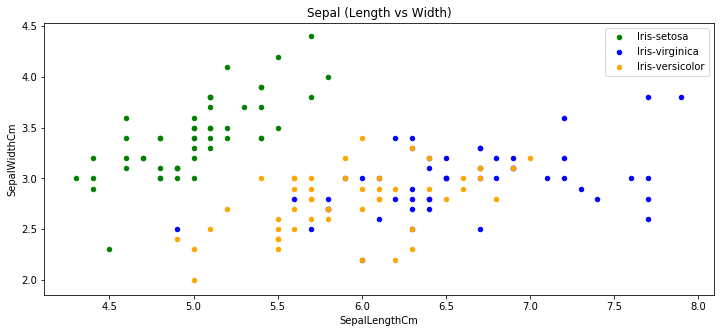

In [60]:
fig=iris_df[iris_df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Iris-setosa')
iris_df[iris_df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='Iris-virginica',ax=fig)
iris_df[iris_df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Iris-versicolor',ax=fig)
fig.set_title("Sepal (Length vs Width)")
fig=plt.gcf() ##for getting referenece of figure so that we can change its property
fig.set_size_inches(12,5)


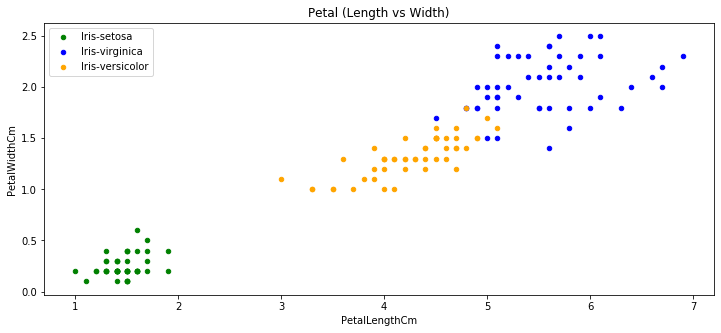

In [61]:
fig=iris_df[iris_df.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label='Iris-setosa')
iris_df[iris_df.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label='Iris-virginica',ax=fig)
iris_df[iris_df.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label='Iris-versicolor',ax=fig)
fig.set_title("Petal (Length vs Width)")
fig=plt.gcf() ##for getting referenece of figure so that we can change its property

fig.set_size_inches(12,5)


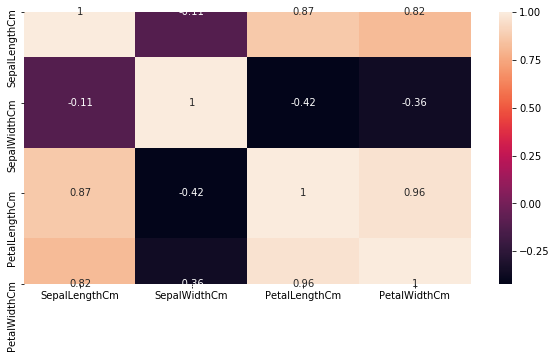

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(iris_df.corr(),annot=True)


In [63]:
 #sns.boxplot(x="Species", y="PetalWidthCm", data=iris_df)
#SepalLengthCm 	SepalWidthCm 	PetalLengthCm 	PetalWidthCm
X=iris_df.drop('Species', axis=1).values 
y=iris_df['Species']

#By this Heatmap we can see  that SepalLength & SepalWidth are not correlated but PetalLength & PetalWidth are highly  corelatted.



In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris_df,iris_df['Species'], test_size=0.3)
#Checked for 80:20 ratio but 70:30 ratio improves accuracy

In [65]:
X_train.shape

(105, 5)

In [66]:
y_train.shape

(105,)

In [67]:
X_train=X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]


In [68]:
X_test=X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
clf=svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print('Accuracy of SVM =',metrics.accuracy_score(pred,y_test))


Accuracy of SVM = 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Confusion Matrix for more analysis

In [50]:
matrix=confusion_matrix(y_test,pred)

In [69]:
print("Confusion Matrix is :")
matrix


Confusion Matrix is :


array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 16]], dtype=int64)

In [36]:
#Checking If we will take only two instances for traing our model which is highly correlated then acuuracy improves or not

In [70]:
X_train=X_train[['PetalLengthCm','PetalWidthCm']]
X_test=X_test[['PetalLengthCm','PetalWidthCm']]
clf=svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print('Accuracy of SVM =',metrics.accuracy_score(pred,y_test))

Accuracy of SVM = 0.9777777777777777


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
matrix=confusion_matrix(y_test,pred)
matrix

array([[13,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 14]], dtype=int64)

In [39]:
#From above confusion matrix we can say that only one confusion is there

### Using k-fold cross validation to check how the model is expected to perform in general when used to make predictions on data not used during the training of the model 

In [138]:
from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=9, random_state=100,shuffle=True)
model_kfold = svm.SVC()
X=iris_df.drop('Species', axis=1).values 
y=iris_df['Species']

results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Cross Validation scores are",results_kfold)

print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 



KFold(n_splits=9, random_state=100, shuffle=True)
Cross Validation scores are [1.         0.94117647 1.         1.         0.94117647 0.88235294
 1.         1.         1.        ]
Accuracy: 97.39%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

##### We can see that for 6 fold accuray is 1 but for 3 fold accuracy is less than simple train_test_split

### Using StratifiedKFold to Check accuracy is changed or not

In [137]:
from sklearn import model_selection

from sklearn.model_selection import StratifiedKFold

skfold = model_selection.StratifiedKFold(n_splits=9, random_state=100,shuffle=True)

model_kfold = svm.SVC()
X=iris_df.drop('Species', axis=1).values 
y=iris_df['Species']

results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=skfold)
print("Cross Validation scores are",results_kfold)

print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 



StratifiedKFold(n_splits=9, random_state=100, shuffle=True)
Cross Validation scores are [1.  1.  1.  1.  1.  0.8 1.  1.  1. ]
Accuracy: 97.78%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

#### We can see that for 8 fold accuray is 1 but for 6th fold accuracy is 0.8
We can observe that Startified k-fold gives better result than k-fold because each fold in startified k-fold is good representative of whole data.